<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# [실습] 데이터프레임 집계

1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2) 다음 경로의 파일을 읽어 graduate 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'
graduate = pd.read_csv(path)

3) 열의 데이터 형식과 값의 개수 등을 확인하세요.

In [3]:
graduate.value_counts()

admit  gre  gpa   rank
1      800  4.00  3       2
       620  3.95  3       2
0      600  2.82  4       2
       700  3.65  2       2
1      700  4.00  1       2
                         ..
0      560  3.78  2       1
            3.61  3       1
            3.59  2       1
            3.49  4       1
       640  3.81  2       1
Length: 395, dtype: int64

4) 기초통계정보를 확인하세요.

In [4]:
graduate.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


5) gre 중앙값을 확인하세요.

In [5]:
graduate['gre'].mean()

587.7

6) rank별 gre 중앙값을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [7]:
tmp = graduate.groupby('rank', as_index = False)[['gre']].median()
print(tmp)

   rank    gre
0     1  600.0
1     2  600.0
2     3  580.0
3     4  560.0


7) rank별 gpa 평균을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [8]:
tmp = graduate.groupby('rank', as_index = False)[['gpa']].mean()
print(tmp)

   rank       gpa
0     1  3.453115
1     2  3.361656
2     3  3.432893
3     4  3.318358


8) rank, admit별 gpa 평균을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [9]:
tmp = graduate.groupby(['rank', 'admit'], as_index = False)[['gpa']].mean()
print(tmp)

   rank  admit       gpa
0     1      0  3.345714
1     1      1  3.544242
2     2      0  3.316598
3     2      1  3.442593
4     3      0  3.402258
5     3      1  3.534643
6     4      0  3.291455
7     4      1  3.441667


9) rank별 합격자 수를 집계하여 tmp 데이터프레임으로 선언하고 막대 그래프로 시각화하여 확인하세요.

In [10]:
tmp = graduate.groupby('rank', as_index=False)[['admit']].value_counts()
tmp

,rank,admit,count
0,1,1,33
1,1,0,28
2,2,0,97
3,2,1,54
4,3,0,93
5,3,1,28
6,4,0,55
7,4,1,12


10) rank별 합격율을 집계하여 tmp 데이터프레임으로 선언하고 막대그래프로 시각화해 확인하세요.

- admit 열 값이 0, 1이므로 admit 열 평균이 합격율이 됨

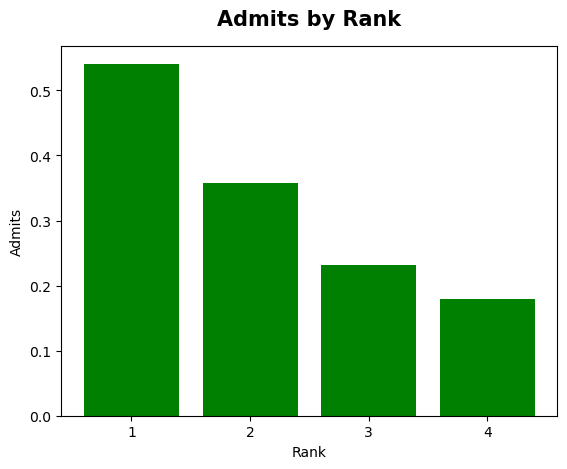

In [18]:
tmp = graduate.groupby('rank', as_index=False)[['admit']].mean()
plt.bar(x=tmp['rank'].astype('str'), height=tmp['admit'], color = 'g')
plt.title('Admits by Rank', size = 15, pad = 15, fontweight='bold')
plt.xlabel('Rank')
plt.ylabel('Admits')
plt.show()